In [1]:
import pandas as pd
from pathlib import Path

In [2]:
%pwd

'/home/jupyter-daniel.davis/pubmed-codeathon-team4/code/Jupyter/notebooks'

In [7]:
rootpath = Path('/home/jupyter-daniel.davis/pubmed-codeathon-team4')
rootpath

PosixPath('/home/jupyter-daniel.davis/pubmed-codeathon-team4')

In [21]:
datapaths = list(rootpath.rglob('newhedge-*/results.csv'))
datapaths

[PosixPath('/home/jupyter-daniel.davis/pubmed-codeathon-team4/data/results/newhedge-2/results.csv'),
 PosixPath('/home/jupyter-daniel.davis/pubmed-codeathon-team4/data/results/newhedge-3/results.csv'),
 PosixPath('/home/jupyter-daniel.davis/pubmed-codeathon-team4/data/results/newhedge-4/results.csv'),
 PosixPath('/home/jupyter-daniel.davis/pubmed-codeathon-team4/data/results/newhedge-1/results.csv')]

In [22]:
df = pd.read_csv(datapaths[0])
df

,search_index,sort,result_count,return_count,error_count,bias_dimension,bias_result_count
0,498409,relevance,51,51,0,race,0
1,498409,relevance,51,51,0,sexual_minorities,0
2,498409,relevance,51,51,0,kids,2
3,498409,relevance,51,51,0,elderly,8
4,498409,relevance,51,51,0,women,10
...,...,...,...,...,...,...,...
35995,719447,date_desc,1366,200,0,sexual_minorities,0
35996,719447,date_desc,1366,200,0,kids,49
35997,719447,date_desc,1366,200,0,elderly,38
35998,719447,date_desc,1366,200,0,women,31


In [38]:
errors = df[(df.error_count > 0) | (df.result_count == 0)]
error_search_indices = errors.search_index.unique()
error_search_indices

array([1093567,  278498,  650958,  758946,  864201, 1075582,  809980,
        459963,  886066,  609005,  147958,  680744,  208468,  180168,
        606805,  549659, 1007548,  192103,  473598,  513804, 1058894,
        595265,  597936, 1150097,  319252,  885012,  147404, 1010554,
        814755, 1040059, 1046977,  534249,  756098,   92066,  482557,
        765146, 1273867,  450971,  979208,  233665,  672175,   22100,
        537950,   17770,  237693, 1245530,  820403,  732123,  622774,
        163004,  600535, 1046057,  417518,  909896,  208562, 1066331,
        667028,  900064,  726621,  760632,  437315,  930862, 1099884,
        344251,  309558,  792094, 1028488, 1218851,  817193,  865479,
        771941,  754203,   55915,  735874,  973259, 1035768,  862585,
        462647,  220317, 1286189,  886358,    4747, 1240693,   96853,
        421812,  728525,  607379,  862607,  757362,  753724, 1265374,
        698900, 1270042, 1029247,  724987,  759816,  724838,  277647,
        256163,  596

In [40]:
df = df[~df.search_index.isin(error_search_indices)]
df

,search_index,sort,result_count,return_count,error_count,bias_dimension,bias_result_count
0,498409,relevance,51,51,0,race,0
1,498409,relevance,51,51,0,sexual_minorities,0
2,498409,relevance,51,51,0,kids,2
3,498409,relevance,51,51,0,elderly,8
4,498409,relevance,51,51,0,women,10
...,...,...,...,...,...,...,...
35995,719447,date_desc,1366,200,0,sexual_minorities,0
35996,719447,date_desc,1366,200,0,kids,49
35997,719447,date_desc,1366,200,0,elderly,38
35998,719447,date_desc,1366,200,0,women,31


In [49]:
race_dd_df = df[(df.bias_dimension == 'race') & (df.sort == 'date_desc')].set_index('search_index')
race_dd_df = race_dd_df.drop(columns=['sort', 'error_count', 'bias_dimension', 'result_count', 'return_count'])
race_dd_df

,bias_result_count
search_index,
357258,0
455371,0
498409,0
502061,0
1145931,0
...,...
439201,1
88266,4
421662,1


In [48]:
race_rel_df = df[(df.bias_dimension == 'race') & (df.sort == 'relevance')].set_index('search_index')
race_rel_df = race_rel_df.drop(columns=['sort', 'error_count', 'bias_dimension', 'result_count', 'return_count'])
race_rel_df

,bias_result_count
search_index,
498409,0
357258,0
455371,0
502061,0
1145931,0
...,...
439201,1
88266,4
421662,1


In [52]:
race_df = race_dd_df.join(race_rel_df, lsuffix='_date_desc', rsuffix='_relevance')
race_df

,bias_result_count_date_desc,bias_result_count_relevance
search_index,,
357258,0,0
455371,0,0
498409,0,0
502061,0,0
1145931,0,0
...,...,...
439201,1,1
88266,4,4
421662,1,1


In [62]:
race_df['differential'] = race_df.bias_result_count_relevance - race_df.bias_result_count_date_desc
amplified_race_df = race_df[~((race_df.bias_result_count_relevance == 0) & (race_df.bias_result_count_date_desc == 0))]
amplified_race_df

,bias_result_count_date_desc,bias_result_count_relevance,differential
search_index,,,
443,1,1,0
48790,2,1,-1
51356,1,1,0
233826,0,1,1
1220972,8,6,-2
...,...,...,...
737830,1,1,0
439201,1,1,0
88266,4,4,0


In [78]:
race_diff_counts = amplified_race_df.groupby('differential').count()
race_diff_counts = race_diff_counts.drop(
    columns=['bias_result_count_relevance']
).rename(
    columns={'bias_result_count_date_desc': 'count'}
)
race_diff_counts

,count
differential,
-16,1
-15,2
-13,1
-12,1
-9,4
-8,1
-7,6
-6,8
-5,26


<AxesSubplot:xlabel='differential'>

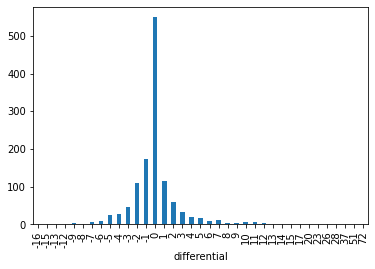

In [79]:
race_diff_counts.plot(kind='bar', legend=False)

In [93]:
def compare_by_bias_dimension(df, dimension):
    dd_df = df[(df.bias_dimension == dimension) & (df.sort == 'date_desc')].set_index('search_index')
    dd_df = dd_df.drop(columns=['sort', 'error_count', 'bias_dimension', 'result_count', 'return_count'])
    rel_df = df[(df.bias_dimension == dimension) & (df.sort == 'relevance')].set_index('search_index')
    rel_df = rel_df.drop(columns=['sort', 'error_count', 'bias_dimension', 'result_count', 'return_count'])
    joined = dd_df.join(rel_df, lsuffix='_date_desc', rsuffix='_relevance')
    joined = joined[~((joined.bias_result_count_relevance == 0) & (joined.bias_result_count_date_desc == 0))]
    joined[dimension] = joined.bias_result_count_relevance - joined.bias_result_count_date_desc
    counts = joined.groupby(dimension).count().drop(
        columns=['bias_result_count_relevance']
    ).rename(
        columns={'bias_result_count_date_desc': 'count'}
    )
    return counts

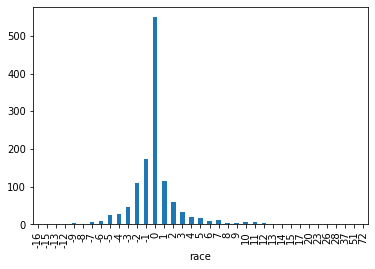

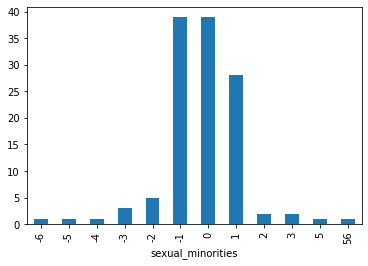

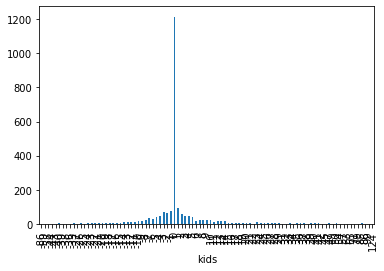

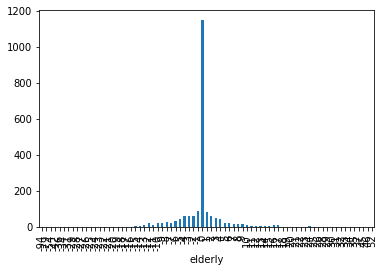

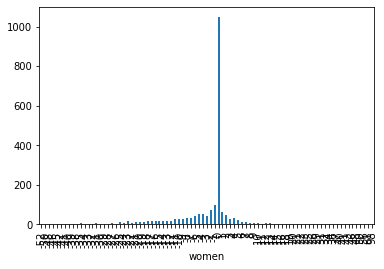

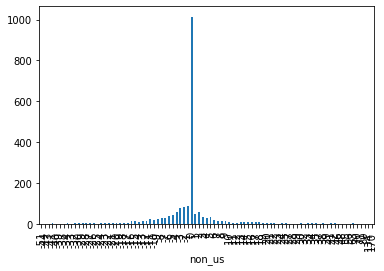

In [94]:
for dimension in df.bias_dimension.unique():
    compare_by_bias_dimension(df, dimension).plot(kind='bar', legend=False)